<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Co2_Emissions_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import metrics

DATA EXTRACTION

---

In [4]:
co2 = pd.read_csv(f"E:\Projects\Machine Learning Projects\Raw Data\Regression\Co2_Emissions_by_Sectors.csv")
co2.head(2), co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

(  Industry_Type         Region  Country  Year  Co2_Emissions_MetricTons  \
 0  Construction  North America   Brazil  2010                     89.13   
 1        Mining         Europe  Germany  2006                    224.81   
 
    Energy_Consumption_TWh  Automobile_Co2_Emissions_MetricTons  \
 0                   90.14                                98.37   
 1                  931.70                                10.81   
 
    Industrial_Co2_Emissions_MetricTons  Agriculture_Co2_Emissions_MetricTons  \
 0                               118.36                                 31.41   
 1                                66.73                                 39.45   
 
    Domestic_Co2_Emissions_MetricTons  Population_Millions  GDP_Billion_USD  \
 0                               0.77               941.06         13096.32   
 1                               0.21              1421.94         24337.71   
 
    Urbanization_Percentage  Renewable_Energy_Percentage  \
 0                    5

DATA PREPROCESSING

---

In [5]:
co2_cop = co2.copy()

In [6]:
enc = LabelEncoder()
obj = co2_cop.select_dtypes(include='object').columns
for i in obj:
    co2_cop[i] = enc.fit_transform(co2_cop[i])
co2_cop.head(2)

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,0,3,1,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,3,2,4,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30


DATA ANALYSIS

---

In [14]:
sns.set()

In [36]:
def plot_style(data, x, y=None, hue=None, style='hist'):
    plt.figure(figsize=(15,3))
    if style=='hist':
        sns.histplot(data[x], kde=True, kde_kws=dict(cut=3))
    elif style=='scatter':
        sns.scatterplot(data=data, x=x, y=y, hue=hue)
    elif style=='box':
        sns.boxplot(data=data, x=x, y=y, hue=hue)
    elif style=='line':
        sns.lineplot(data=data, x=x, y=y, hue=hue)
    else:
        raise ValueError('style unacceptable')
    plt.show()

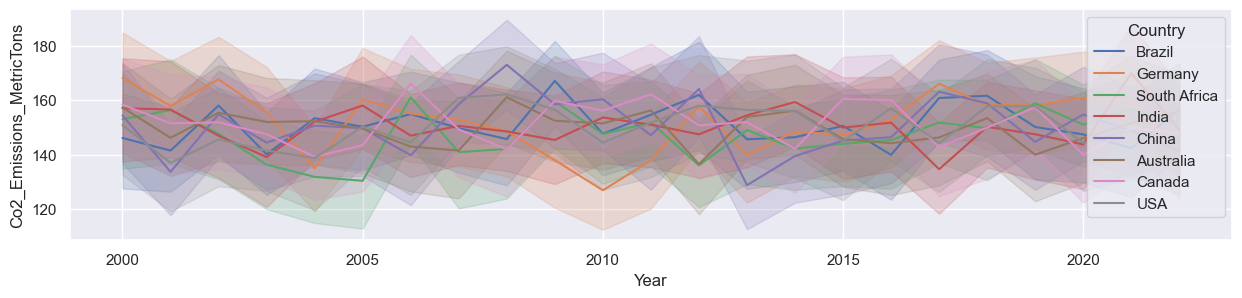

In [40]:
plot_style(co2, x='Year', y='Co2_Emissions_MetricTons', style='line', hue='Country')

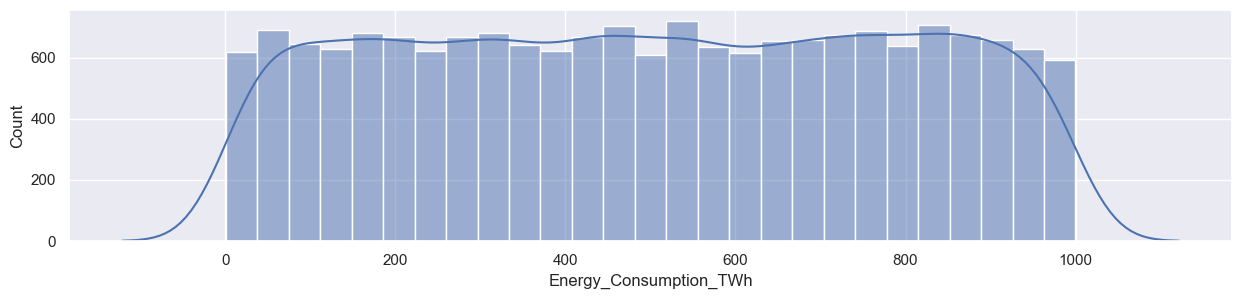

In [42]:
plot_style(co2, x='Energy_Consumption_TWh', style='hist')

In [44]:
corr = co2_cop.corr()
print(corr['Co2_Emissions_MetricTons'].sort_values(ascending=False).round(3)*100)

Co2_Emissions_MetricTons               100.00
Domestic_Co2_Emissions_MetricTons        1.40
Population_Millions                      1.40
Energy_Consumption_TWh                   1.20
Industrial_Growth_Percentage             0.80
Industrial_Co2_Emissions_MetricTons      0.70
GDP_Billion_USD                          0.70
Transport_Growth_Percentage              0.60
Year                                     0.30
Renewable_Energy_Percentage              0.00
Region                                  -0.20
Country                                 -0.40
Urbanization_Percentage                 -0.80
Agriculture_Co2_Emissions_MetricTons    -0.90
Automobile_Co2_Emissions_MetricTons     -0.90
Industry_Type                           -1.10
Name: Co2_Emissions_MetricTons, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [49]:
X = co2_cop.drop(columns=['Region', 'Country', 'Urbanization_Percentage', \
                          'Agriculture_Co2_Emissions_MetricTons', 'Automobile_Co2_Emissions_MetricTons', \
                            'Industry_Type'], axis=1)
y = co2_cop.iloc[:,4]

sc=StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [05:40<00:04,  4.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 14148, number of used features: 10
[LightGBM] [Info] Start training from score 149.611450


100%|██████████| 42/42 [05:41<00:00,  8.12s/it]


In [53]:
models.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,1.00,1.00,0.00,0.66
LassoLarsIC,1.00,1.00,0.00,0.13
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.06
LarsCV,1.00,1.00,0.00,0.12
Lars,1.00,1.00,0.00,0.09


In [54]:
from sklearn.linear_model import HuberRegressor

rg = HuberRegressor()
rg.fit(X_train, y_train)

HuberRegressor()

MODEL EVALUATION

---

In [55]:
r2_scr = metrics.r2_score(y_test, rg.predict(X_test))
print(f"R2 Score for test is {r2_scr}")

R2 Score for test is 1.0
